In [379]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import warnings
import datetime as dt
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
import scipy.stats as sts
import matplotlib.pyplot as plt

from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [343]:
allin=pd.read_csv('result 2', sep='\t')
result=pd.read_csv('result', sep='\t')
result

,Название IPO / SPO,Отрасль,Биржа размещения,"Объем привлеченных средств, млн. USD",Дата окончания размещения
0,ВТБ (SPO-4),Финансовые услуги,ММВБ,1 157,07.06.2023
1,Genetico,Биотехнологии и медико-биологические исследова...,ММВБ,2,25.04.2023
2,Whoosh,"Технологии, телекоммуникации и медиа, Транспор...",ММВБ,33,14.12.2022
3,КазМунайГаз,Нефть и газ,"Astana International Exchange (AIX), KASE",330,02.12.2022
4,Positive Technologies (SPO),"Технологии, телекоммуникации и медиа",ММВБ,17,28.09.2022
...,...,...,...,...,...
368,Kaspi.kz (SPO),NaN,London Stock Exchange,366,15.03.2021
369,Европлан (IPO-II),"Транспорт и логистика, Финансовые услуги",ММВБ,NaN,NaN
370,Mercury Retail Group (MRG),"FMCG, Торговля и потребительский сектор",ММВБ,1 300,NaN
371,Алмазы Арктики (АЛМАР),Металлургия и горное дело,Санкт-Петербургская биржа,9,NaN


# Обработка данных

In [344]:
for i in range(len(result['Дата окончания размещения'])):
    if pd.Series(result['Дата окончания размещения'].iloc[i], dtype=str).str.contains(' 20' or ' 19')[0]==True:
        print (result.iloc[i])
#Оказалось, что не все даты записаны в одинаковом формате. Здесь мы ищем эти даты

Название IPO / SPO                            ViOil Holding S.A.
Отрасль                                 Сельское хозяйство и АПК
Биржа размещения                           Warsaw Stock Exchange
Объем привлеченных средств, млн. USD                         150
Дата окончания размещения                               Июл 2011
Name: 121, dtype: object
Название IPO / SPO                          Пробизнесбанк
Отрасль                                 Финансовые услуги
Биржа размещения                                      NaN
Объем привлеченных средств, млн. USD                  NaN
Дата окончания размещения                        Авг 2011
Name: 126, dtype: object
Название IPO / SPO                            Теплофон
Отрасль                                 Другие отрасли
Биржа размещения                                  ММВБ
Объем привлеченных средств, млн. USD                 3
Дата окончания размещения                     Июн 2011
Name: 127, dtype: object
Название IPO / SPO                 

Далее, мы попытались перевести дату окончания размещения в datetime, но столкнулись с тем, что данные записаны в разном формате. Пришлось искать каждую строку с другим форматом и менять руками.

In [345]:
new=result
new['Дата окончания размещения'].iloc[121]='30.07.2011'
new['Дата окончания размещения'].iloc[126]='30.08.2011'
new['Дата окончания размещения'].iloc[127]='30.06.2011'
new['Дата окончания размещения'].iloc[128]='30.06.2011'
new['Дата окончания размещения'] = pd.to_datetime(result['Дата окончания размещения'], format='%d.%m.%Y')
new.sort_values('Дата окончания размещения',ignore_index=True)
#Перевели все даты в формат datetime и отсортировали по ни таблицу

,Название IPO / SPO,Отрасль,Биржа размещения,"Объем привлеченных средств, млн. USD",Дата окончания размещения
0,JKX Oil & Gas,Нефть и газ,London Stock Exchange,NaN,1995-06-18
1,Everfor Diamonds,"Добыча золота, алмазов и драгоценных камней",LSE's AIM,NaN,1996-04-06
2,Eurasia Mining,"Металлургия и горное дело, Нефть и газ",LSE's AIM,NaN,1996-10-02
3,Газпром,Нефть и газ,London Stock Exchange,429.0,1996-10-28
4,Вымпелком,"Технологии, телекоммуникации и медиа",NYSE,111.0,1996-11-13
...,...,...,...,...,...
368,Высочайший (GV Gold),Металлургия и горное дело,"London Stock Exchange, ММВБ",500,NaT
369,Цифра,"Металлургия и горное дело, Технологии, телеком...",ММВБ,NaN,NaT
370,Европлан (IPO-II),"Транспорт и логистика, Финансовые услуги",ММВБ,NaN,NaT
371,Mercury Retail Group (MRG),"FMCG, Торговля и потребительский сектор",ММВБ,1 300,NaT


Удаляем "проспект эмиссий", т.к. там просто название файла и дублирующиеся колонки с основной таблицей

In [347]:
rex=allin.drop(['Цена размещения, USD','Рост/Падение с даты размещения','Окончание','Объем привлеченных средств, млн. USD','Биржа размещения','Отрасль','Проспект эмиссии','Offering Memorandum'],axis=1)
rex

,Название,Спецификация размещения,Тип размещения,Тип подписки,Начало,Статус,Количество размещённых ц.б.,Инвестиционные банки,Страна операций,"Ценовой коридор, верхняя граница, USD","Ценовой коридор, нижняя граница, USD","Капитализация на момент размещения, млн. USD"
0,Genetico,акция обыкновенная,IPO,Открытый,12.04.2023,Завершено,10 000 000,"АЛОР ИНВЕСТ, ИВА Партнерс",Россия,NaN,NaN,NaN
1,Genetico,акция обыкновенная,IPO,Открытый,12.04.2023,Завершено,10 000 000,"АЛОР ИНВЕСТ, ИВА Партнерс",Россия,NaN,NaN,NaN
2,Whoosh,акция обыкновенная,IPO,Открытый,05.12.2022,Завершено,NaN,"Сбербанк, Тинькофф банк","Беларусь, Казахстан, Россия",3.56,2.92,326
3,КазМунайГаз,акция обыкновенная,IPO,Открытый,23.11.2022,Завершено,18 296 455,Freedom Finance,Казахстан,NaN,NaN,11 000
4,Positive Technologies (SPO),акция обыкновенная,SPO,Открытый,19.09.2022,Завершено,932 600,БКС-банк,Россия,22.00,20.00,1 234
...,...,...,...,...,...,...,...,...,...,...,...,...
369,Иркут,акция обыкновенная,IPO,Открытый,15.03.2004,Завершено,205 000 000,МДМ-Банк,Россия,0.68,0.54,522
370,КОКС,"GDR, акция обыкновенная",IPO,Открытый,24.01.2011,Отложено,NaN,"Citigroup, UBS Investment Bank, ВТБ Капитал",Россия,8.00,6.25,NaN
371,ФосАгро,GDR,IPO,Открытый,26.06.2011,Завершено,1 280 952,"Citigroup, Ренессанс Капитал",Россия,16.50,13.00,5 200
372,ММК,"GDR, акция обыкновенная",IPO,Открытый,09.04.2007,Завершено,1 040 000 000,"ABN AMRO, Morgan Stanley, Газпромбанк, Ренесса...",Россия,1.19,0.94,11 221


In [348]:
new.rename(columns = {'Название IPO / SPO':'Название'}, inplace=True )
fin=new.merge(rex, on='Название', how='left')
final=fin.loc[fin['Название'].duplicated(keep = 'first')==False]
final.reset_index(drop= True,inplace= True )
final

,Название,Отрасль,Биржа размещения,"Объем привлеченных средств, млн. USD",Дата окончания размещения,Спецификация размещения,Тип размещения,Тип подписки,Начало,Статус,Количество размещённых ц.б.,Инвестиционные банки,Страна операций,"Ценовой коридор, верхняя граница, USD","Ценовой коридор, нижняя граница, USD","Капитализация на момент размещения, млн. USD"
0,ВТБ (SPO-4),Финансовые услуги,ММВБ,1 157,2023-06-07,акция обыкновенная,SPO,Открытый,23.05.2023,Завершено,5 157 750 342 936,NaN,Россия,NaN,NaN,NaN
1,Genetico,Биотехнологии и медико-биологические исследова...,ММВБ,2,2023-04-25,акция обыкновенная,IPO,Открытый,12.04.2023,Завершено,10 000 000,"АЛОР ИНВЕСТ, ИВА Партнерс",Россия,NaN,NaN,NaN
2,Whoosh,"Технологии, телекоммуникации и медиа, Транспор...",ММВБ,33,2022-12-14,акция обыкновенная,IPO,Открытый,05.12.2022,Завершено,NaN,"Сбербанк, Тинькофф банк","Беларусь, Казахстан, Россия",3.56,2.92,326
3,КазМунайГаз,Нефть и газ,"Astana International Exchange (AIX), KASE",330,2022-12-02,акция обыкновенная,IPO,Открытый,23.11.2022,Завершено,18 296 455,Freedom Finance,Казахстан,NaN,NaN,11 000
4,Positive Technologies (SPO),"Технологии, телекоммуникации и медиа",ММВБ,17,2022-09-28,акция обыкновенная,SPO,Открытый,19.09.2022,Завершено,932 600,БКС-банк,Россия,22.00,20.00,1 234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,Kaspi.kz (SPO),NaN,London Stock Exchange,366,2021-03-15,GDR,SPO,Открытый,NaN,Завершено,6 000 000,"Citigroup, Morgan Stanley",NaN,NaN,NaN,NaN
368,Европлан (IPO-II),"Транспорт и логистика, Финансовые услуги",ММВБ,NaN,NaT,акция обыкновенная,IPO,Открытый,NaN,Планируемый,NaN,NaN,NaN,NaN,NaN,NaN
369,Mercury Retail Group (MRG),"FMCG, Торговля и потребительский сектор",ММВБ,1 300,NaT,GDR,IPO,Открытый,NaN,Отложено,200 000 000,"Bank of America, JP Morgan, ВТБ Капитал, Газпр...",Россия,6.50,6.00,13 000
370,Алмазы Арктики (АЛМАР),Металлургия и горное дело,Санкт-Петербургская биржа,9,NaT,акция обыкновенная,IPO,Открытый,NaN,Планируемый,21 805,"ITI Capital, ИФК Солид",Россия,NaN,NaN,NaN


Совмещаем полученные таблицы, а дальше снова ищем даты, неподходящие под формат, но теперь в "Начале".

In [349]:
for i in range(len(final['Начало'])):
    if pd.Series(final['Начало'].iloc[i], dtype=str).str.contains(' 20' or ' 19')[0]==True:
        print (final['Начало'].iloc[i])
        print (i)

Май 2013
90
Ноя 2012
100
Окт 2011
115
Июн 2011
125
Июн 2011
126
Июн 2011
127
Июн 2011
128
Сен 2010
170


In [350]:
for i in range(len(final['Начало'])):
    if pd.Series(final['Начало'].iloc[i], dtype=str).str.contains('.20' or '.19')[0]==False:
        print (final['Начало'].iloc[i])
        print (i)

2013
95
2013
96
2012
112
2011
151
2011
152
2011
153
2011
154
2011
155
20.10.1996
304
02.10.1996
305
07.06.1995
306


In [351]:
final['Начало'].iloc[90]='01.05.2013'
final['Начало'].iloc[100]='01.11.2012'
final['Начало'].iloc[115]='01.10.2011'
final['Начало'].iloc[125]='01.06.2011'
final['Начало'].iloc[126]='01.06.2011'
final['Начало'].iloc[127]='01.06.2011'
final['Начало'].iloc[128]='01.06.2011'
final['Начало'].iloc[170]='01.09.2010'
final['Начало'].iloc[95]='01.01.2013'
final['Начало'].iloc[96]='01.01.2013'
final['Начало'].iloc[155]='01.01.2011'
final['Начало'].iloc[154]='01.01.2011'
final['Начало'].iloc[153]='01.01.2011'
final['Начало'].iloc[152]='01.01.2011'
final['Начало'].iloc[151]='01.01.2011'
final['Начало'].iloc[112]='01.01.2012'
final['Начало'] = pd.to_datetime(final['Начало'], format='%d.%m.%Y')
final['Отрасль'].fillna('Другие отрасли', inplace=True)

final2=final
final2

,Название,Отрасль,Биржа размещения,"Объем привлеченных средств, млн. USD",Дата окончания размещения,Спецификация размещения,Тип размещения,Тип подписки,Начало,Статус,Количество размещённых ц.б.,Инвестиционные банки,Страна операций,"Ценовой коридор, верхняя граница, USD","Ценовой коридор, нижняя граница, USD","Капитализация на момент размещения, млн. USD"
0,ВТБ (SPO-4),Финансовые услуги,ММВБ,1 157,2023-06-07,акция обыкновенная,SPO,Открытый,2023-05-23,Завершено,5 157 750 342 936,NaN,Россия,NaN,NaN,NaN
1,Genetico,Биотехнологии и медико-биологические исследова...,ММВБ,2,2023-04-25,акция обыкновенная,IPO,Открытый,2023-04-12,Завершено,10 000 000,"АЛОР ИНВЕСТ, ИВА Партнерс",Россия,NaN,NaN,NaN
2,Whoosh,"Технологии, телекоммуникации и медиа, Транспор...",ММВБ,33,2022-12-14,акция обыкновенная,IPO,Открытый,2022-12-05,Завершено,NaN,"Сбербанк, Тинькофф банк","Беларусь, Казахстан, Россия",3.56,2.92,326
3,КазМунайГаз,Нефть и газ,"Astana International Exchange (AIX), KASE",330,2022-12-02,акция обыкновенная,IPO,Открытый,2022-11-23,Завершено,18 296 455,Freedom Finance,Казахстан,NaN,NaN,11 000
4,Positive Technologies (SPO),"Технологии, телекоммуникации и медиа",ММВБ,17,2022-09-28,акция обыкновенная,SPO,Открытый,2022-09-19,Завершено,932 600,БКС-банк,Россия,22.00,20.00,1 234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,Kaspi.kz (SPO),Другие отрасли,London Stock Exchange,366,2021-03-15,GDR,SPO,Открытый,NaT,Завершено,6 000 000,"Citigroup, Morgan Stanley",NaN,NaN,NaN,NaN
368,Европлан (IPO-II),"Транспорт и логистика, Финансовые услуги",ММВБ,NaN,NaT,акция обыкновенная,IPO,Открытый,NaT,Планируемый,NaN,NaN,NaN,NaN,NaN,NaN
369,Mercury Retail Group (MRG),"FMCG, Торговля и потребительский сектор",ММВБ,1 300,NaT,GDR,IPO,Открытый,NaT,Отложено,200 000 000,"Bank of America, JP Morgan, ВТБ Капитал, Газпр...",Россия,6.50,6.00,13 000
370,Алмазы Арктики (АЛМАР),Металлургия и горное дело,Санкт-Петербургская биржа,9,NaT,акция обыкновенная,IPO,Открытый,NaT,Планируемый,21 805,"ITI Capital, ИФК Солид",Россия,NaN,NaN,NaN


Ручками меняем даты, переводим в datetime, а дальше меняем все числовые переменные в нормальный формат :')

In [352]:
import numpy as np
s=[]
final1=final2
for i in range(len(final1['Объем привлеченных средств, млн. USD'])):
    s.append(str(final1['Объем привлеченных средств, млн. USD'][i]))

for i in range (len(s)):
    s[i]=s[i].replace(' ','')
    s[i]=s[i].replace('.0','')
    if s[i]!='nan':
        s[i]=int(s[i])
    if s[i]=='nan':
        s[i]=np.nan

final1['Объем привлеченных средств, млн. USD']=s
b=[]

for i in range(len(final1['Количество размещённых ц.б.'])):
    b.append(str(final1['Количество размещённых ц.б.'][i]))

for i in range (len(b)):
    b[i]=b[i].replace(' ','')
    b[i]=b[i].replace('.0','')
    if b[i]!='nan':
        b[i]=int(b[i])

final1['Количество размещённых ц.б.']=b
final1['Количество размещённых ц.б.'].replace('nan', np.nan, inplace=True)
a=[]

for i in range(len(final1['Капитализация на момент размещения, млн. USD'])):
    a.append(str(final1['Капитализация на момент размещения, млн. USD'][i]))

for i in range (len(a)):
    a[i]=a[i].replace(' ','')
    a[i]=a[i].replace('.0','')
    if a[i]!='nan':
        a[i]=int(a[i])

final1['Капитализация на момент размещения, млн. USD']=a
final1['Капитализация на момент размещения, млн. USD'].replace('nan', np.nan, inplace=True)
final1

,Название,Отрасль,Биржа размещения,"Объем привлеченных средств, млн. USD",Дата окончания размещения,Спецификация размещения,Тип размещения,Тип подписки,Начало,Статус,Количество размещённых ц.б.,Инвестиционные банки,Страна операций,"Ценовой коридор, верхняя граница, USD","Ценовой коридор, нижняя граница, USD","Капитализация на момент размещения, млн. USD"
0,ВТБ (SPO-4),Финансовые услуги,ММВБ,1157.0,2023-06-07,акция обыкновенная,SPO,Открытый,2023-05-23,Завершено,5.157750e+12,NaN,Россия,NaN,NaN,NaN
1,Genetico,Биотехнологии и медико-биологические исследова...,ММВБ,2.0,2023-04-25,акция обыкновенная,IPO,Открытый,2023-04-12,Завершено,1.000000e+07,"АЛОР ИНВЕСТ, ИВА Партнерс",Россия,NaN,NaN,NaN
2,Whoosh,"Технологии, телекоммуникации и медиа, Транспор...",ММВБ,33.0,2022-12-14,акция обыкновенная,IPO,Открытый,2022-12-05,Завершено,NaN,"Сбербанк, Тинькофф банк","Беларусь, Казахстан, Россия",3.56,2.92,326.0
3,КазМунайГаз,Нефть и газ,"Astana International Exchange (AIX), KASE",330.0,2022-12-02,акция обыкновенная,IPO,Открытый,2022-11-23,Завершено,1.829646e+07,Freedom Finance,Казахстан,NaN,NaN,11000.0
4,Positive Technologies (SPO),"Технологии, телекоммуникации и медиа",ММВБ,17.0,2022-09-28,акция обыкновенная,SPO,Открытый,2022-09-19,Завершено,9.326000e+05,БКС-банк,Россия,22.00,20.00,1234.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,Kaspi.kz (SPO),Другие отрасли,London Stock Exchange,366.0,2021-03-15,GDR,SPO,Открытый,NaT,Завершено,6.000000e+06,"Citigroup, Morgan Stanley",NaN,NaN,NaN,NaN
368,Европлан (IPO-II),"Транспорт и логистика, Финансовые услуги",ММВБ,NaN,NaT,акция обыкновенная,IPO,Открытый,NaT,Планируемый,NaN,NaN,NaN,NaN,NaN,NaN
369,Mercury Retail Group (MRG),"FMCG, Торговля и потребительский сектор",ММВБ,1300.0,NaT,GDR,IPO,Открытый,NaT,Отложено,2.000000e+08,"Bank of America, JP Morgan, ВТБ Капитал, Газпр...",Россия,6.50,6.00,13000.0
370,Алмазы Арктики (АЛМАР),Металлургия и горное дело,Санкт-Петербургская биржа,9.0,NaT,акция обыкновенная,IPO,Открытый,NaT,Планируемый,2.180500e+04,"ITI Capital, ИФК Солид",Россия,NaN,NaN,NaN


In [353]:
print(final1['Объем привлеченных средств, млн. USD'].isnull().sum())
print(final1['Количество размещённых ц.б.'].isnull().sum())
print(final1['Капитализация на момент размещения, млн. USD'].isnull().sum())
print(final1['Ценовой коридор, нижняя граница, USD'].isnull().sum())
print(final1['Ценовой коридор, верхняя граница, USD'].isnull().sum())
#Смотрим где многовато нанов и удаляем

37
68
155
183
183


В нескольких столбцах признаки просто перечисленны через запятую, делаем из них массив, чтобы можно было работать дальше.

In [354]:
masss=final1.drop(['Капитализация на момент размещения, млн. USD'], axis=1)
masss=masss.drop(['Ценовой коридор, нижняя граница, USD'], axis=1)
masss=masss.drop(['Ценовой коридор, верхняя граница, USD'], axis=1)
for i in range (len(final['Отрасль'])):
    masss['Отрасль'][i] = str(masss['Отрасль'][i]).split(',')
    masss['Биржа размещения'][i] = str(masss['Биржа размещения'][i]).split(',')
    masss['Инвестиционные банки'][i] = str(masss['Инвестиционные банки'][i]).split(',')
    masss['Страна операций'][i] = str(masss['Страна операций'][i]).split(',')
masss

,Название,Отрасль,Биржа размещения,"Объем привлеченных средств, млн. USD",Дата окончания размещения,Спецификация размещения,Тип размещения,Тип подписки,Начало,Статус,Количество размещённых ц.б.,Инвестиционные банки,Страна операций
0,ВТБ (SPO-4),[Финансовые услуги],[ММВБ],1157.0,2023-06-07,акция обыкновенная,SPO,Открытый,2023-05-23,Завершено,5.157750e+12,[nan],[Россия]
1,Genetico,[Биотехнологии и медико-биологические исследов...,[ММВБ],2.0,2023-04-25,акция обыкновенная,IPO,Открытый,2023-04-12,Завершено,1.000000e+07,"[АЛОР ИНВЕСТ, ИВА Партнерс]",[Россия]
2,Whoosh,"[Технологии, телекоммуникации и медиа, Транс...",[ММВБ],33.0,2022-12-14,акция обыкновенная,IPO,Открытый,2022-12-05,Завершено,NaN,"[Сбербанк, Тинькофф банк]","[Беларусь, Казахстан, Россия]"
3,КазМунайГаз,[Нефть и газ],"[Astana International Exchange (AIX), KASE]",330.0,2022-12-02,акция обыкновенная,IPO,Открытый,2022-11-23,Завершено,1.829646e+07,[Freedom Finance],[Казахстан]
4,Positive Technologies (SPO),"[Технологии, телекоммуникации и медиа]",[ММВБ],17.0,2022-09-28,акция обыкновенная,SPO,Открытый,2022-09-19,Завершено,9.326000e+05,[БКС-банк],[Россия]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,Kaspi.kz (SPO),[Другие отрасли],[London Stock Exchange],366.0,2021-03-15,GDR,SPO,Открытый,NaT,Завершено,6.000000e+06,"[Citigroup, Morgan Stanley]",[nan]
368,Европлан (IPO-II),"[Транспорт и логистика, Финансовые услуги]",[ММВБ],NaN,NaT,акция обыкновенная,IPO,Открытый,NaT,Планируемый,NaN,[nan],[nan]
369,Mercury Retail Group (MRG),"[FMCG, Торговля и потребительский сектор]",[ММВБ],1300.0,NaT,GDR,IPO,Открытый,NaT,Отложено,2.000000e+08,"[Bank of America, JP Morgan, ВТБ Капитал, Г...",[Россия]
370,Алмазы Арктики (АЛМАР),[Металлургия и горное дело],[Санкт-Петербургская биржа],9.0,NaT,акция обыкновенная,IPO,Открытый,NaT,Планируемый,2.180500e+04,"[ITI Capital, ИФК Солид]",[Россия]


С помощью explode разделяем все полученные массивы на отдельные признаки. 
Заметили, что ММВБ, РТС и МФБ выделяются как отдельные биржи, заменяем все на MOEX и удаляем дубликаты.
Когда мы разделяли отрасли через запятую отрасль Технологии, телекоммуникации и медиа, а также Добыча золота, алмазов и драгоценных камней разделились на две каждая. Исправляем. Заменяем числовые значения на средние в отрасли.

In [355]:
#Финальные данные
tall=masss.explode("Страна операций",ignore_index = True)
for i in range(len(tall['Страна операций'])):
    tall['Страна операций'][i]=tall['Страна операций'][i].title().lstrip()
tall=tall.explode("Инвестиционные банки",ignore_index = True)
for i in range(len(tall['Инвестиционные банки'])):
    tall['Инвестиционные банки'][i]=tall['Инвестиционные банки'][i].title().lstrip()
tall=tall.explode("Биржа размещения",ignore_index = True)
for i in range(len(tall['Биржа размещения'])):
    tall['Биржа размещения'][i]=tall['Биржа размещения'][i].title().lstrip()
    if tall['Биржа размещения'][i]=='Ммвб' or tall['Биржа размещения'][i]=='Мфб' or tall['Биржа размещения'][i]=='Ртс':
        tall['Биржа размещения'][i]='Moex'
tall=tall.explode("Отрасль",ignore_index = True)
for i in range(len(tall['Отрасль'])):
    tall['Отрасль'][i]=tall['Отрасль'][i].title().lstrip()
    if tall['Отрасль'][i]=='Телекоммуникации И Медиа' or tall['Отрасль'][i]=='Технологии':
        tall['Отрасль'][i]='Технологии'
    if tall['Отрасль'][i]=='Добыча Золота' or tall['Отрасль'][i]=='Алмазов И Драгоценных Камней':
        tall['Отрасль'][i]='Добыча Золота И Драгоценных Камней'
tall.drop_duplicates(subset=['Отрасль', 'Название','Инвестиционные банки','Страна операций','Биржа размещения'],   inplace=True)
tall.drop_duplicates(inplace=True, ignore_index = True)

ind=tall.loc[(tall['Статус']=="Завершено")&(tall['Объем привлеченных средств, млн. USD'].isnull())].index
for i in ind:
    tall['Объем привлеченных средств, млн. USD'].iloc[i]=np.mean(tall.loc[tall['Отрасль']==tall['Отрасль'].iloc[i]]['Объем привлеченных средств, млн. USD'])
ind1=tall.loc[(tall['Статус']=="Завершено")&(tall['Объем привлеченных средств, млн. USD'].isnull())].index
tall.drop(index=[171],inplace=True)
tall.reset_index(drop=True, inplace=True)
ind2=tall.loc[(tall['Статус']=="Завершено")&(tall['Количество размещённых ц.б.'].isnull())].index
for i in ind2:
    tall['Количество размещённых ц.б.'].iloc[i]=np.mean(tall.loc[tall['Отрасль']==tall['Отрасль'].iloc[i]]['Количество размещённых ц.б.'])
tall

,Название,Отрасль,Биржа размещения,"Объем привлеченных средств, млн. USD",Дата окончания размещения,Спецификация размещения,Тип размещения,Тип подписки,Начало,Статус,Количество размещённых ц.б.,Инвестиционные банки,Страна операций
0,ВТБ (SPO-4),Финансовые Услуги,Moex,1157.0,2023-06-07,акция обыкновенная,SPO,Открытый,2023-05-23,Завершено,5.157750e+12,Nan,Россия
1,Genetico,Биотехнологии И Медико-Биологические Исследования,Moex,2.0,2023-04-25,акция обыкновенная,IPO,Открытый,2023-04-12,Завершено,1.000000e+07,Алор Инвест,Россия
2,Genetico,Медицинские Услуги,Moex,2.0,2023-04-25,акция обыкновенная,IPO,Открытый,2023-04-12,Завершено,1.000000e+07,Алор Инвест,Россия
3,Genetico,Биотехнологии И Медико-Биологические Исследования,Moex,2.0,2023-04-25,акция обыкновенная,IPO,Открытый,2023-04-12,Завершено,1.000000e+07,Ива Партнерс,Россия
4,Genetico,Медицинские Услуги,Moex,2.0,2023-04-25,акция обыкновенная,IPO,Открытый,2023-04-12,Завершено,1.000000e+07,Ива Партнерс,Россия
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1261,Mercury Retail Group (MRG),Fmcg,Moex,1300.0,NaT,GDR,IPO,Открытый,NaT,Отложено,2.000000e+08,Сбербанк,Россия
1262,Mercury Retail Group (MRG),Торговля И Потребительский Сектор,Moex,1300.0,NaT,GDR,IPO,Открытый,NaT,Отложено,2.000000e+08,Сбербанк,Россия
1263,Алмазы Арктики (АЛМАР),Металлургия И Горное Дело,Санкт-Петербургская Биржа,9.0,NaT,акция обыкновенная,IPO,Открытый,NaT,Планируемый,2.180500e+04,Iti Capital,Россия
1264,Алмазы Арктики (АЛМАР),Металлургия И Горное Дело,Санкт-Петербургская Биржа,9.0,NaT,акция обыкновенная,IPO,Открытый,NaT,Планируемый,2.180500e+04,Ифк Солид,Россия


Разбиваем основную таблицу на 4 подгруппы по одному из 4 признаков.

In [356]:
otr=tall.drop_duplicates(subset=['Отрасль', 'Название'])
bir=tall.drop_duplicates(subset=['Биржа размещения', 'Название'])
cou=tall.drop_duplicates(subset=['Страна операций', 'Название'])
inv=tall.drop_duplicates(subset=['Инвестиционные банки', 'Название'])

# Визуализация


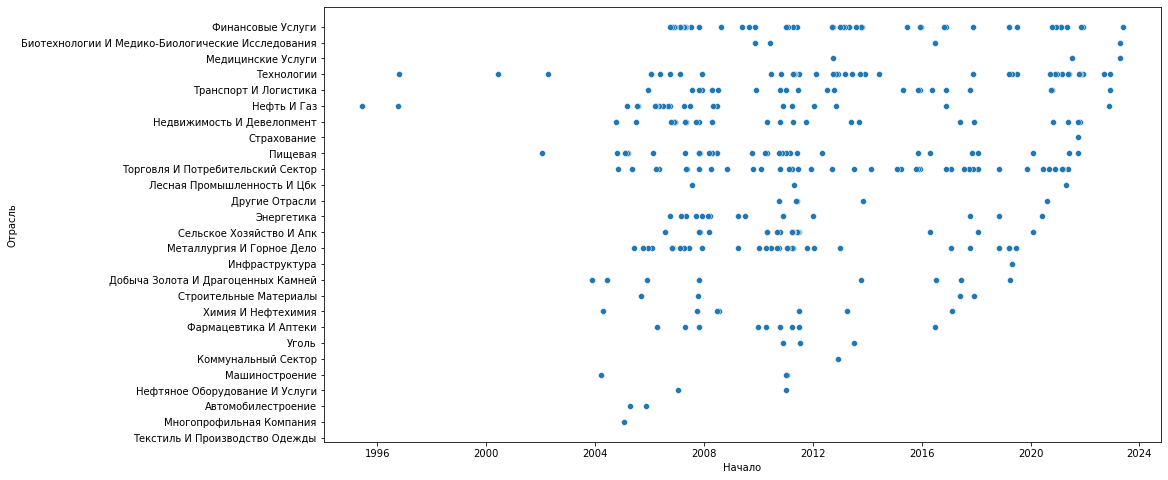

In [357]:
#Визуализация
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (15,8))
ax=sns.scatterplot(x='Начало', y='Отрасль', data=otr)

plt.show()

Большая часть сделок начала проходить с открытием крупных бирж в странах СНГ, так как до этого только крупнейшие компании из СНГ могли позволить себе листинг на той же LSE.

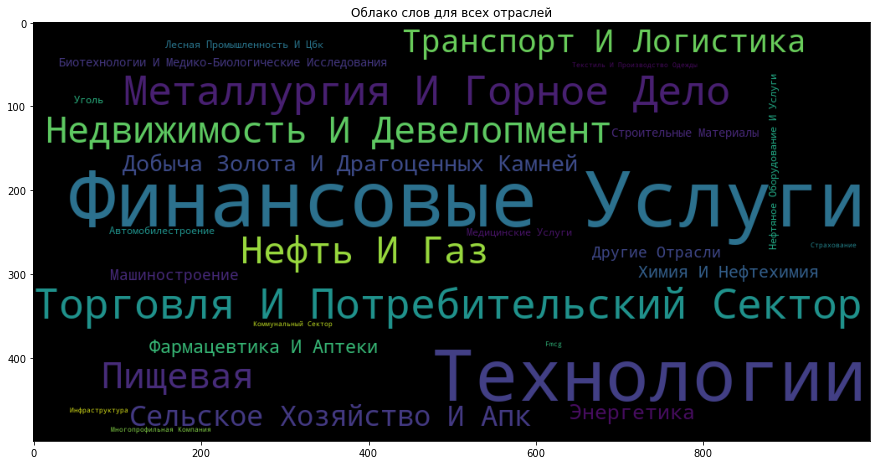

In [364]:



df_sum = otr['Отрасль'].value_counts().to_frame()
df_to_dict = dict(df_sum['Отрасль'])


wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(df_to_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud);
plt.title('Облако слов для всех отраслей');


По wordcloud мы заметили, что не так у нас с отраслями! (И исправили это выше)

Переходим к гипотезам, для этого посмотрим как зависит объем размещения от биржи, от отрасли, а так же средняя доля участия банков на рынке SPO и IPO.

# Гипотезы

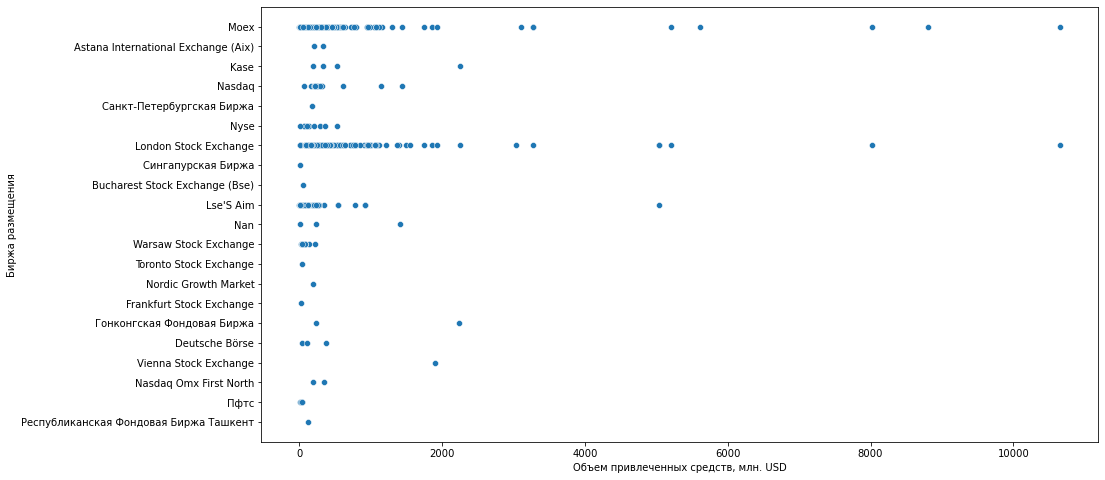

In [365]:
#Гипотезы

plt.figure(figsize = (15,8))
ax=sns.scatterplot(x='Объем привлеченных средств, млн. USD', y='Биржа размещения', data=bir.loc[bir['Статус']=='Завершено'])

plt.show()

Размещения на Лондонской и Московской биржах, показались нам схожими, проверим не все ли они результат двойного листинга.

In [366]:
bir['MOEX'] = np.where(bir['Биржа размещения']=='Moex', 1, 0)
bir['LSE']= np.where(bir['Биржа размещения']=='London Stock Exchange', 1, 0)
bir['H_1']=bir['MOEX']+bir['LSE']
bir1=bir
bir1=bir1.loc[bir1['H_1']!=0]
bir1=bir1.loc[bir1['Статус']=='Завершено']
bir1

,Название,Отрасль,Биржа размещения,"Объем привлеченных средств, млн. USD",Дата окончания размещения,Спецификация размещения,Тип размещения,Тип подписки,Начало,Статус,Количество размещённых ц.б.,Инвестиционные банки,Страна операций,MOEX,LSE,H_1
0,ВТБ (SPO-4),Финансовые Услуги,Moex,1157.0,2023-06-07,акция обыкновенная,SPO,Открытый,2023-05-23,Завершено,5.157750e+12,Nan,Россия,1,0,1
1,Genetico,Биотехнологии И Медико-Биологические Исследования,Moex,2.0,2023-04-25,акция обыкновенная,IPO,Открытый,2023-04-12,Завершено,1.000000e+07,Алор Инвест,Россия,1,0,1
5,Whoosh,Технологии,Moex,33.0,2022-12-14,акция обыкновенная,IPO,Открытый,2022-12-05,Завершено,5.117461e+07,Сбербанк,Беларусь,1,0,1
19,Positive Technologies (SPO),Технологии,Moex,17.0,2022-09-28,акция обыкновенная,SPO,Открытый,2022-09-19,Завершено,9.326000e+05,Бкс-Банк,Россия,1,0,1
60,Softline,Технологии,London Stock Exchange,400.0,2021-10-27,GDR,IPO,Открытый,2021-10-18,Завершено,5.333333e+07,Alfa Capital Markets,Глобальный Рынок,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210,Седьмой Континент / SPO-1,Торговля И Потребительский Сектор,Moex,238.0,2006-04-12,акция обыкновенная,SPO,Открытый,NaT,Завершено,1.048060e+07,Ufg Asset Management,Россия,1,0,1
1211,Белон,Металлургия И Горное Дело,Moex,57.0,2006-06-05,акция обыкновенная,IPO,Открытый,NaT,Завершено,1.500000e+06,Тройка Диалог,Россия,1,0,1
1231,Мироновский хлебопродукт / SPO,Пищевая,London Stock Exchange,165.0,2010-12-08,GDR,SPO,Открытый,NaT,Завершено,1.000000e+07,Morgan Stanley,Украина,0,1,1
1233,Alliance Oil (IPO),Нефть И Газ,London Stock Exchange,390.0,2009-07-12,GDR,IPO,Открытый,NaT,Завершено,7.287367e+08,Merrill Lynch,Россия,0,1,1


In [367]:
df34=pd.DataFrame({'MOEX':list(bir1['MOEX']), 'LSE':list(bir1['LSE']), "Название":list(bir1['Название'])})
df34.groupby('Название').sum().corr()


,MOEX,LSE
MOEX,1.00000,-0.78982
LSE,-0.78982,1.00000


Корреляция отрицательная, значит двойной листинг тут ни при чем. Выдвинем гипотезу о том, что средний объем на обеих биржах равен.
Гипотеза Н0: Е(MOEX)=E(LSE) H1:E(LSE)>Е(MOEX)

In [368]:
alpha=0.05
y = bir1.loc[bir1['Биржа размещения']=='Moex']['Объем привлеченных средств, млн. USD']
x = bir1.loc[bir1['Биржа размещения']=='London Stock Exchange']['Объем привлеченных средств, млн. USD']

diff = x.mean() - y.mean() 
diff_std = np.sqrt(x.var(ddof=1)/x.size + y.var(ddof=1)/y.size)
z_obs = diff/diff_std
z_obs

1.0783343323003496

In [369]:
z_crit = sts.norm.ppf(1 - alpha)

z_crit

1.6448536269514722

Гипотеза о равенстве не отвергается. Действительно, средний объем на LSE и MOEX примерно равен.

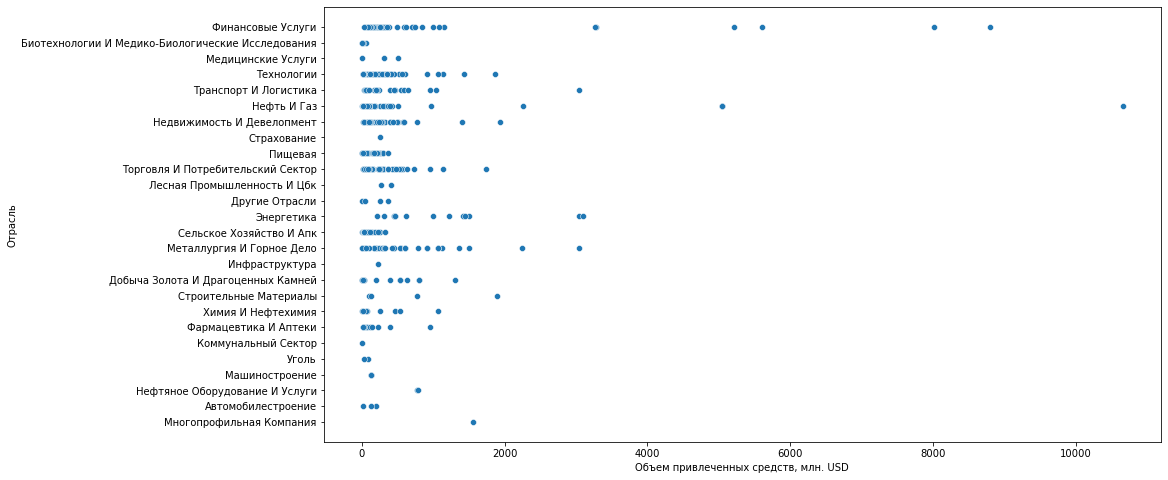

In [370]:
plt.figure(figsize = (15,8))
ax=sns.scatterplot(x='Объем привлеченных средств, млн. USD', y='Отрасль', data=otr.loc[otr['Статус']=='Завершено'])

plt.show()

По графику видно, что средний объем размещений сильно смещен к оси ординат. Принято считать, что для западных рынков выходы компаний из СНГ малы по объему и не превышают полумиллиарда долларов.
Гипотеза H0: E=500, H1: E>500.

In [371]:
alpha=0.05
y = otr['Объем привлеченных средств, млн. USD']
diff_std = np.sqrt(y.var(ddof=1)/y.size)
z_obs = (-np.mean(y)+500)/diff_std
z_obs

-0.6553009043515517

In [372]:
import scipy.stats as sts
z_crit = sts.norm.ppf(1-alpha)

z_crit

1.6448536269514722

Гипотеза о равенстве не отвергается. Действительно, компании из СНГ, как правило, маловаты для крупных рынков.

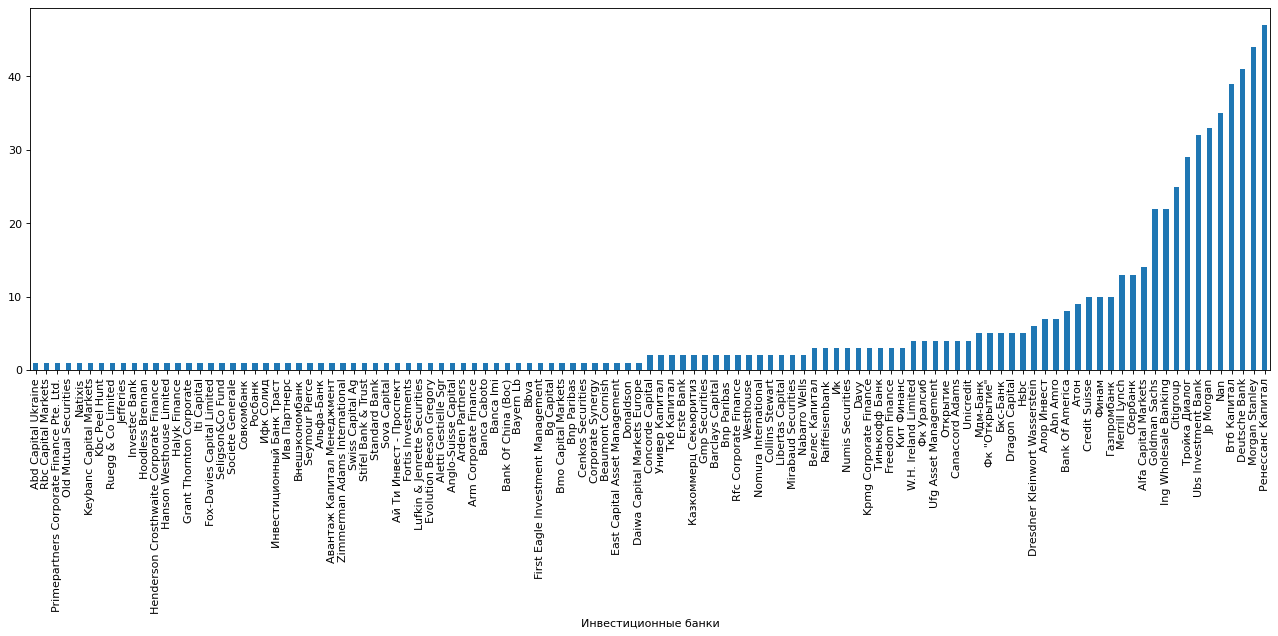

In [373]:
plt.figure(figsize=(20, 6), dpi=80)
inv[inv['Тип размещения']=='IPO'].groupby(['Инвестиционные банки'])['Тип размещения'].count().sort_values().plot.bar()
plt.show()

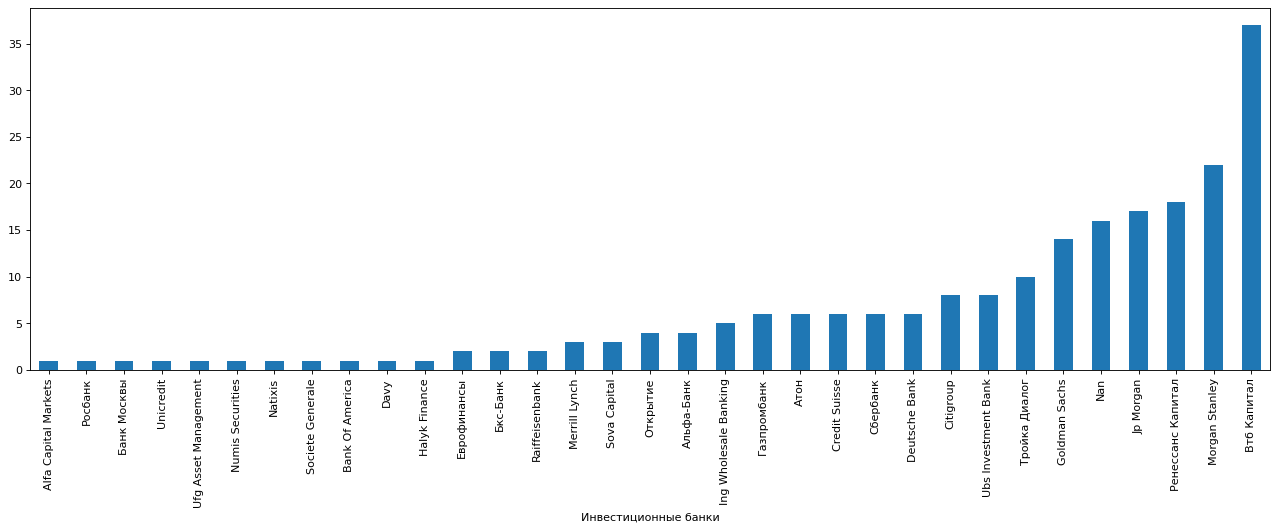

In [374]:
plt.figure(figsize=(20, 6), dpi=80)
inv[inv['Тип размещения']=='SPO'].groupby(['Инвестиционные банки'])['Тип размещения'].count().sort_values().plot.bar()
plt.show()

Можно заметить, что в основном банки вкладываются на IPO, то есть рынок SPO менее перенасыщен, а значит доля участия каждого банка на рынке SPO должна быть больше. 
Гипотеза H0: p(ipo)=p(spo) H1: p(ipo)<p(spo)

In [375]:
nipo=sum(inv[inv['Тип размещения']=='IPO'].groupby(['Инвестиционные банки'])['Тип размещения'].count())
nspo=sum(inv[inv['Тип размещения']=='SPO'].groupby(['Инвестиционные банки'])['Тип размещения'].count())
pipo=inv[inv['Тип размещения']=='IPO'].groupby(['Инвестиционные банки'])['Тип размещения'].count()/nipo
pspo=inv[inv['Тип размещения']=='SPO'].groupby(['Инвестиционные банки'])['Тип размещения'].count()/nspo
diff=-np.mean(pipo)+np.mean(pspo)
piest=np.mean(pipo)
psest=np.mean(pspo)
a=np.sqrt((piest*(1-piest)/nipo)+(psest*(1-psest)/nspo))*1.96
observed=diff/a
observed

0.8943390530322913

In [376]:
import scipy.stats as sts
crit = sts.norm.ppf(1-alpha)

crit

1.6448536269514722

Несмотря на то, что рынок IPO обширнее, средняя доля участия каждого банка в рынке примерно равна и для IPO, и для SPO.
Так как на рынке IPO СНГ много банков, инвестирующих в одну конкретную компанию.

# Модель

In [377]:
table = pd.pivot_table(otr.loc[otr['Статус']=='Завершено'], values='Объем привлеченных средств, млн. USD', index=['Название'], columns=['Отрасль'], aggfunc=np.sum)
pivot=table.fillna(0)
pivot

Отрасль,Автомобилестроение,Биотехнологии И Медико-Биологические Исследования,Добыча Золота И Драгоценных Камней,Другие Отрасли,Инфраструктура,Коммунальный Сектор,Лесная Промышленность И Цбк,Машиностроение,Медицинские Услуги,Металлургия И Горное Дело,...,Страхование,Строительные Материалы,Технологии,Торговля И Потребительский Сектор,Транспорт И Логистика,Уголь,Фармацевтика И Аптеки,Финансовые Услуги,Химия И Нефтехимия,Энергетика
Название,,,,,,,,,,,,,,,,,,,,,
"""ТКС Банк""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1087.0,0.0,0.0
AFI Development,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AgroGeneration (SPO),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aisi Realty Public,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Alliance Oil (IPO),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Шалкия Цинк,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,105.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Юралс Энерджи,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ютинет.Ру,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Составим сводную таблицу и попробуем решить задачу классификации для инвест банков. В какой инвест банк лучше обращаться, с известной отраслью компании и желаемым объемом размещения?

In [378]:
inv=tall.drop_duplicates(subset=['Инвестиционные банки', 'Название'])
inv1=inv.loc[inv['Инвестиционные банки']!='Nan']
birnew1=pd.DataFrame({'class':list(inv1.loc[(inv1['Статус']=='Завершено')&(inv1['Отрасль']!=np.nan)]['Инвестиционные банки'])},inv1.loc[(inv1['Статус']=='Завершено')&(inv1['Отрасль']!=np.nan)]['Название'])
an=pivot.merge(birnew1,on='Название')
dt={}
for i in range(len(an['class'].unique())):
    dt[an['class'].unique()[i]]=i
classnum=[]
for i in range(len(an)):
    classnum.append(dt[an['class'].iloc[i]])
an['class number']=classnum
an

,Автомобилестроение,Биотехнологии И Медико-Биологические Исследования,Добыча Золота И Драгоценных Камней,Другие Отрасли,Инфраструктура,Коммунальный Сектор,Лесная Промышленность И Цбк,Машиностроение,Медицинские Услуги,Металлургия И Горное Дело,...,Технологии,Торговля И Потребительский Сектор,Транспорт И Логистика,Уголь,Фармацевтика И Аптеки,Финансовые Услуги,Химия И Нефтехимия,Энергетика,class,class number
Название,,,,,,,,,,,,,,,,,,,,,
"""ТКС Банк""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1087.0,0.0,0.0,Goldman Sachs,0
"""ТКС Банк""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1087.0,0.0,0.0,Jp Morgan,1
"""ТКС Банк""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1087.0,0.0,0.0,Morgan Stanley,2
"""ТКС Банк""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1087.0,0.0,0.0,Ренессанс Капитал,3
"""ТКС Банк""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1087.0,0.0,0.0,Сбербанк,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Яндекс,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1435.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Deutsche Bank,6
Яндекс,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1435.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Morgan Stanley,2
Яндекс (SPO),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,607.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Deutsche Bank,6


Для обучения модели присвоим каждому классу(инвест банку) номер.

In [380]:

y = an["class number"]
X = an.drop(columns=["class number",'class'])

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=425)
Xtrain

,Автомобилестроение,Биотехнологии И Медико-Биологические Исследования,Добыча Золота И Драгоценных Камней,Другие Отрасли,Инфраструктура,Коммунальный Сектор,Лесная Промышленность И Цбк,Машиностроение,Медицинские Услуги,Металлургия И Горное Дело,...,Страхование,Строительные Материалы,Технологии,Торговля И Потребительский Сектор,Транспорт И Логистика,Уголь,Фармацевтика И Аптеки,Финансовые Услуги,Химия И Нефтехимия,Энергетика
Название,,,,,,,,,,,,,,,,,,,,,
Группа Русагро (SPO-II),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Московский кредитный банк (МКБ) (SPO),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,228.0,0.0,0.0
Русснефть,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Сеть гипермаркетов ""Лента"" (IPO)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,952.0,0.0,0.0,0.0,0.0,0.0,0.0
Иркут,0.0,0.0,0.0,0.0,0.0,0.0,0.0,127.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Открытые инвестиции / SPO-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Детский мир (SPO-2),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,158.0,0.0,0.0,0.0,0.0,0.0,0.0
Kaspi.kz,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1000.0,0.0,0.0


Получим тестовую и тренировочную выборку и приступаем к обучению модели.

In [381]:
model_reg1 = LogisticRegression()
model_reg1.fit(Xtrain, ytrain)

LogisticRegression()

In [382]:
model_reg1.predict(Xtest)

array([31,  9, 22,  1,  1,  3,  2,  9,  9,  2, 22, 22, 22,  1,  6,  2,  9,
        1, 22,  1,  1, 22,  2,  2,  9, 22,  9,  9,  2,  1, 22, 22, 22,  6,
        2, 22, 10, 22,  6,  2, 22,  2,  2, 22, 22,  9,  1, 10,  6,  2,  5,
        9, 22,  9, 22,  1,  6,  3, 10,  2,  1,  1, 10, 22,  2, 31,  2, 22,
        2,  6, 10, 10,  1, 22,  6,  1,  2,  2,  2,  6,  1,  2,  2, 22,  2,
       10,  2,  9,  2, 22,  2,  5,  1, 22,  3,  1, 22,  3,  5,  9,  2,  2,
       10, 10,  2,  1,  9,  9, 22, 22,  5,  6,  9,  1,  2,  1,  1,  2, 22,
        1,  2, 10,  2,  3,  2,  1, 22,  9, 10,  9,  6, 22,  1, 22,  1,  2,
        2, 22,  9,  2, 10, 22,  6,  1, 22, 22,  2, 22], dtype=int64)

Модель выдает нам номер класса для тестовой выборки

In [383]:

pre=precision_score(ytest, model_reg1.predict(Xtest),average='macro')
pre
#Это плохо мы придумали


0.007222222222222222

In [384]:
acc=accuracy_score(ytest, model_reg1.predict(Xtest))
acc

0.05405405405405406

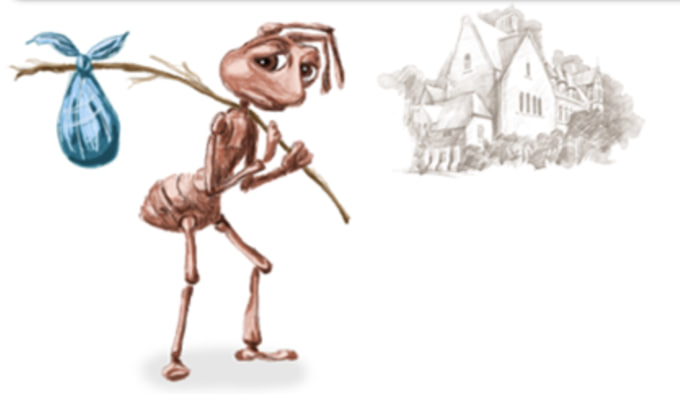

Модель считает мягко говоря так себе. Слишком много классов и маловато данных за всю историю листингов в СНГ. Упростим задачу и рассортируем все банки на два класса по среднему объему размещения комании, в которую они инвестировали.

In [385]:
first=[]
for i in range (0,57):
    first.append(inv.groupby(['Инвестиционные банки'])['Объем привлеченных средств, млн. USD'].mean().sort_values().index[i])
second=[]
for i in range (57,115):
    second.append(inv.groupby(['Инвестиционные банки'])['Объем привлеченных средств, млн. USD'].mean().sort_values().index[i])

In [386]:
inv3=tall.drop_duplicates(subset=['Инвестиционные банки', 'Название'])
inv2=inv3.loc[inv3['Инвестиционные банки']!='Nan']
birnew2=pd.DataFrame({'class':list(inv1.loc[(inv1['Статус']=='Завершено')&(inv1['Отрасль']!=np.nan)]['Инвестиционные банки'])},inv1.loc[(inv1['Статус']=='Завершено')&(inv1['Отрасль']!=np.nan)]['Название'])
an2=pivot.merge(birnew2,on='Название')
classnum1=[]
for i in range(len(an2)):
    if an2['class'].iloc[i] in first:
        classnum1.append(1)
    if an2['class'].iloc[i] in second:
        classnum1.append(2)
an2['class number']=classnum1
an2

,Автомобилестроение,Биотехнологии И Медико-Биологические Исследования,Добыча Золота И Драгоценных Камней,Другие Отрасли,Инфраструктура,Коммунальный Сектор,Лесная Промышленность И Цбк,Машиностроение,Медицинские Услуги,Металлургия И Горное Дело,...,Технологии,Торговля И Потребительский Сектор,Транспорт И Логистика,Уголь,Фармацевтика И Аптеки,Финансовые Услуги,Химия И Нефтехимия,Энергетика,class,class number
Название,,,,,,,,,,,,,,,,,,,,,
"""ТКС Банк""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1087.0,0.0,0.0,Goldman Sachs,2
"""ТКС Банк""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1087.0,0.0,0.0,Jp Morgan,2
"""ТКС Банк""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1087.0,0.0,0.0,Morgan Stanley,2
"""ТКС Банк""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1087.0,0.0,0.0,Ренессанс Капитал,2
"""ТКС Банк""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1087.0,0.0,0.0,Сбербанк,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Яндекс,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1435.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Deutsche Bank,2
Яндекс,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1435.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Morgan Stanley,2
Яндекс (SPO),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,607.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Deutsche Bank,2


In [387]:
y2 = an2["class number"]
X2 = an2.drop(columns=["class number",'class'])

Xtrain2, Xtest2, ytrain2, ytest2 = train_test_split(X2, y2, test_size=0.2, random_state=425)
Xtrain2

,Автомобилестроение,Биотехнологии И Медико-Биологические Исследования,Добыча Золота И Драгоценных Камней,Другие Отрасли,Инфраструктура,Коммунальный Сектор,Лесная Промышленность И Цбк,Машиностроение,Медицинские Услуги,Металлургия И Горное Дело,...,Страхование,Строительные Материалы,Технологии,Торговля И Потребительский Сектор,Транспорт И Логистика,Уголь,Фармацевтика И Аптеки,Финансовые Услуги,Химия И Нефтехимия,Энергетика
Название,,,,,,,,,,,,,,,,,,,,,
Группа Русагро (SPO-II),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Московский кредитный банк (МКБ) (SPO),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,228.0,0.0,0.0
Русснефть,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Сеть гипермаркетов ""Лента"" (IPO)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,952.0,0.0,0.0,0.0,0.0,0.0,0.0
Иркут,0.0,0.0,0.0,0.0,0.0,0.0,0.0,127.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Открытые инвестиции / SPO-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Детский мир (SPO-2),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,158.0,0.0,0.0,0.0,0.0,0.0,0.0
Kaspi.kz,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1000.0,0.0,0.0


In [388]:
model_reg = LogisticRegression()
model_reg.fit(Xtrain2, ytrain2)
pre=precision_score(ytest2, model_reg.predict(Xtest2),average='micro')
pre

0.9391891891891891

we love casting spells
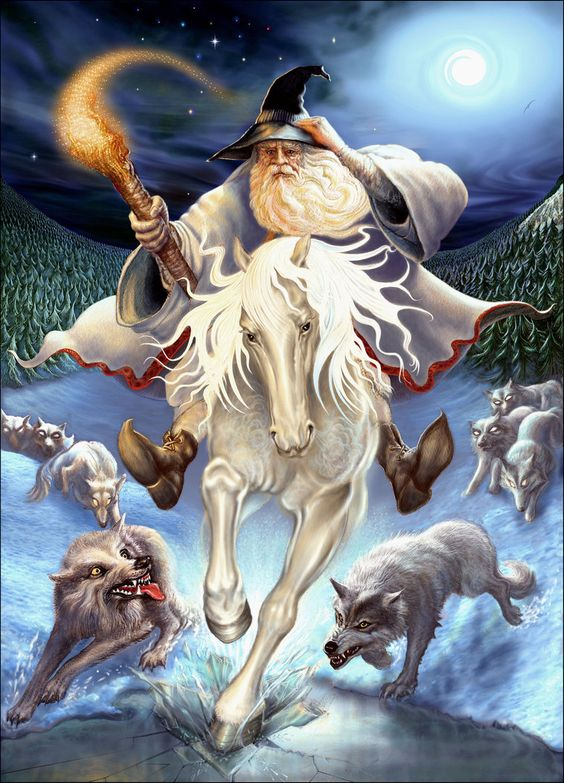

Получили супер мега точную модель, которая сможет подсказать вашей компании в какой кластер инвест банков ей лучше обращаться при листинге.